In [1]:
import pathlib
import numpy as np

from fytok.Tokamak import Tokamak
from spdm.view import View as sp_view
from spdm.data.Path import Path

data_path = pathlib.Path("/home/salmon/workspace/fytok_data/data/15MA inductive - burn")

2023-12-23 12:55:54,816 [    spdm]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 version = alpha  (spdm=beta extension=0.2.2.dev19+g14adade.d20231205, imas_version=v3_38_1_dirty)

 Run by salmon at 2023-12-23T12:55:54.239308.
 Job ID: fytok_salmon_surface_24988

###################################################################################################



In [2]:
tokamak = Tokamak(
    f"file+iterprofiles://{next(data_path.glob('*ASTRA.xls')).absolute().as_posix()}",
    f"file+geqdsk://{next(data_path.glob('**/g*.txt')).absolute().as_posix()}",
    device="iter",
    shot=900003,
    equilibrium={"code": {"parameters": {"psi_norm": np.linspace(0.01, 0.995, 64)}}},
    core_transport={
        "model": [
            {"code": {"name": "dummy"}},
            # {"code": {"name": "fast_alpha"}},
        ]
    },
    core_sources={
        "source": [
            {"code": {"name": "dummy"}},
            # {"code": {"name": "collisional_equipartition"}},
            # {"code": {"name": "fusion_reaction", "parameters": {"reactions": ["D(t,n)alpha"]}}},
        ]
    },
    transport_solver={
        "code": {
            "name": "fy_trans",
            "parameters": {
                "rho_tor_norm": np.linspace(0.01, 0.999, 128),
                "bvp_rms_mask": [0.96],
                "hyper_diff": 0.0001,
                "max_nodes": 200,
                "bc_tol": 1,
                "verbose": 2,
            },
        },
        "thermal_particle": ["D", "T"],  #
        # "fast_particle": ["alpha"],
        # "impurities": ["Ar", "Be"],
        "boundary_condition_type": {
            # fmt: off
            "psi"                       : (1, 1),
            "*|density"                 : (2, 1),
            "*|temperature"             : (2, 1),
            "electrons|temperature"     : (2, 1),
            # "ion|He|temperature"        : (2, 1),
            # fmt: on
        },
        "normalize_units": {
            "*|density": 1.0e21,
            "*|density_flux": 1.0e24,
            "ion|alpha|density": 1.0e18,
            "ion|alpha|density_flux": 1.0e21,
            # "ion|He|density": 1.0e18,
            # "ion|He|density_flux": 1.0e20,
            "*|temperature": 1.0e6,
            "*|temperature_flux": 1.0e27,
        },
    },
)

2023-12-23 12:55:55,422 [    spdm]     INFO: Load module spdm.plugins.data.plugin_xml
2023-12-23 12:55:55,933 [    spdm]     INFO: Load module spdm.plugins.data.plugin_iterprofiles
2023-12-23 12:55:56,102 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk


2023-12-23 12:55:56,796 [    spdm]     INFO: Load module fytok.plugins.equilibrium.fy_eq
2023-12-23 12:55:56,809 [    spdm]     INFO: Initialize module fytok.modules.Wall 
2023-12-23 12:55:56,818 [    spdm]     INFO: Initialize module fytok.modules.TF 
2023-12-23 12:55:56,828 [    spdm]     INFO: Initialize module fytok.modules.Magnetics 
2023-12-23 12:55:56,842 [    spdm]     INFO: Initialize module fytok.modules.PFActive 
2023-12-23 12:55:56,853 [    spdm]     INFO: Initialize module fytok.plugins.equilibrium.fy_eq 
2023-12-23 12:55:56,893 [    spdm]     INFO: Initialize module fytok.modules.CoreProfiles 
2023-12-23 12:55:56,903 [    spdm]     INFO: Initialize module fytok.modules.CoreTransport 
2023-12-23 12:55:56,912 [    spdm]     INFO: Initialize module fytok.plugins.core_transport.model.dummy 
2023-12-23 12:55:56,963 [    spdm]     INFO: Load module spdm.view.view_matplotlib


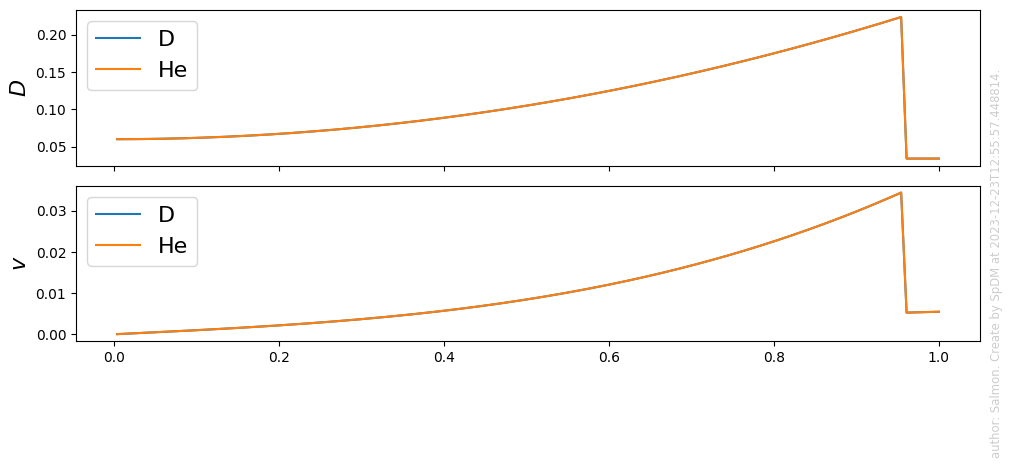

In [3]:
trans_1d = tokamak.core_transport.model[0].time_slice.current.profiles_1d
fig = sp_view.plot(
    trans_1d.grid_d.rho_tor_norm,
    (
        [
            (trans_1d.ion[0].particles.d, trans_1d.ion[0].label),
            (trans_1d.ion[2].particles.d, trans_1d.ion[2].label),
        ],
        {"y_label": "D"},
    ),
    (
        [
            (trans_1d.ion[0].particles.v, trans_1d.ion[0].label),
            (trans_1d.ion[2].particles.v, trans_1d.ion[2].label),
        ],
        {"y_label": "v"},
    ),
)

2023-12-23 12:55:58,361 [    spdm]     INFO: Initialize module fytok.modules.CoreSources 
2023-12-23 12:55:58,381 [    spdm]     INFO: Initialize module fytok.plugins.core_sources.source.dummy 


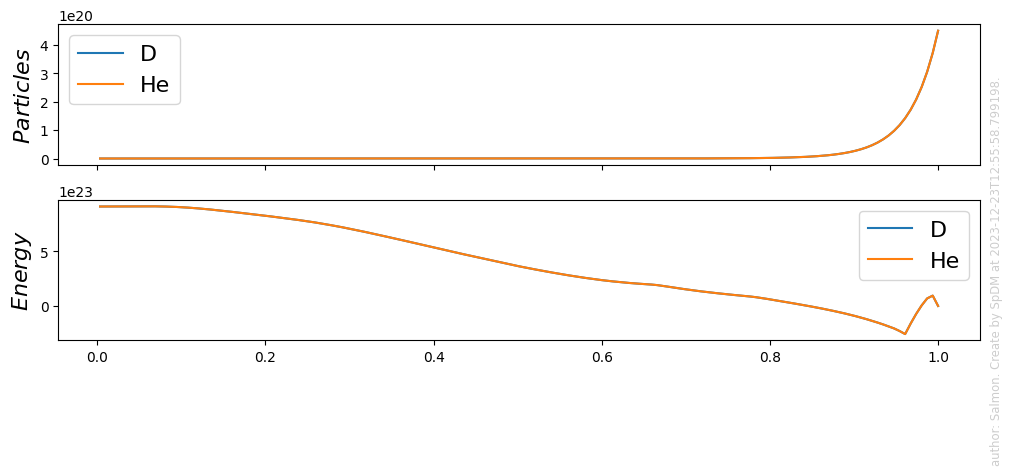

In [4]:
source_1d = tokamak.core_sources.source[0].time_slice.current.profiles_1d
fig = sp_view.plot(
    source_1d.grid.rho_tor_norm,
    (
        [
            (source_1d.ion[0].particles, source_1d.ion[0].label),
            (source_1d.ion[2].particles, source_1d.ion[2].label),
        ],
        {"y_label": "Particles"},
    ),
    (
        [
            (source_1d.ion[0].energy, source_1d.ion[0].label),
            (source_1d.ion[2].energy, source_1d.ion[2].label),
        ],
        {"y_label": "Energy"},
    ),
)

In [5]:
tokamak.transport_solver.refresh(
    time=0.0,
    # fmt:off
    initial_value={
        "ion/D/density":                    1.0e19,
        "ion/T/density":                    1.0e19,
        "ion/He/density":                   1.0e16,
        "ion/alpha/density":                0.0,

        "ion/D/temperature":                200,
        "ion/T/temperature":                200,
        "ion/He/temperature":               200,
        "electrons/temperature":            200,
    },
    boundary_value={
        "ion/D/density":                    ([0.0], [1.3e19]), 
        "ion/T/density":                    ([0.0], [1.3e19]), 
        "ion/He/density":                   ([0.0], [0.0]), 
        "ion/alpha/density":                ([0.0], [0.0]), 

        "ion/D/temperature":                ([0.0], [200]),   
        "ion/T/temperature":                ([0.0], [200]),   
        "ion/He/temperature":               ([0.0], [200]),   

        "electrons/temperature":            ([0.0], [200]),   
    },
    # fmt:on
)
solver_1d = tokamak.transport_solver.time_slice.current

2023-12-23 12:55:59,682 [    spdm]     INFO: Load module fytok.plugins.transport_solver_numerics.fy_trans
2023-12-23 12:55:59,696 [    spdm]     INFO: Initialize module fytok.plugins.transport_solver_numerics.fy_trans 
2023-12-23 12:56:01,037 [    spdm]    DEBUG: /home/salmon/workspace/fytok/python/fytok/modules/TransportSolverNumerics.py:368:preprocess:  Variables : ['psi', 'psi_flux', 'ion/D/density', 'ion/D/density_flux', 'ion/D/temperature', 'ion/D/temperature_flux', 'ion/T/density', 'ion/T/density_flux', 'ion/T/temperature', 'ion/T/temperature_flux', 'electrons/temperature', 'electrons/temperature_flux']
2023-12-23 12:56:02,202 [    spdm]     INFO: Solve transport equations : 
2023-12-23 12:56:02,207 [    spdm]     INFO: Execute module fytok.plugins.transport_solver_numerics.fy_trans
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.70e-02       5.39e+14          128            17       
       2          2.28e-03       1.34e+02       

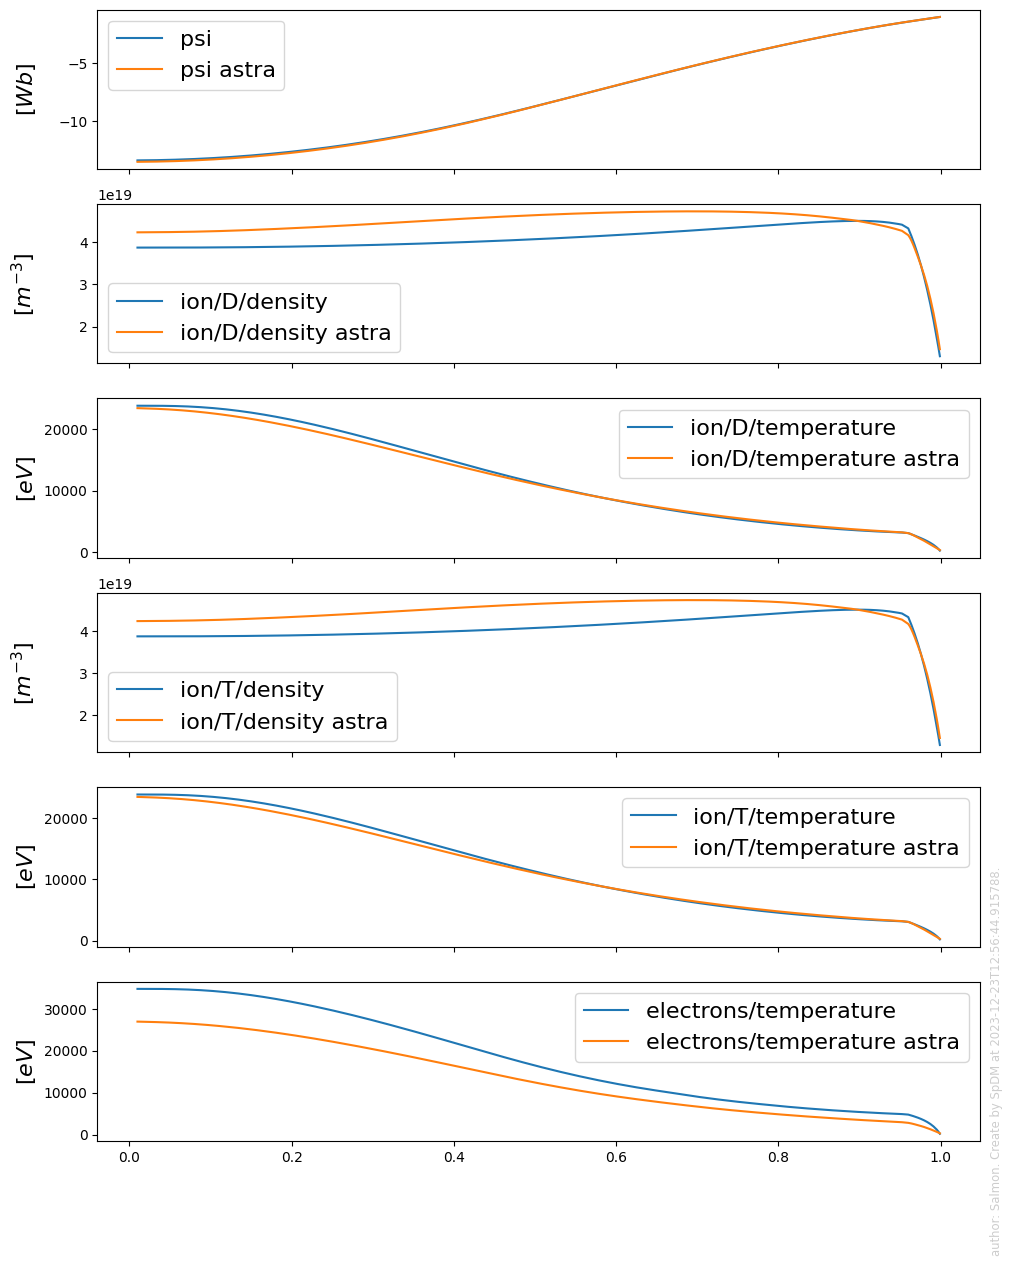

In [6]:
core_profiles_1d = tokamak.transport_solver.fetch()
core_profiles_1d_astra = tokamak.core_profiles.fetch().profiles_1d
fig = sp_view.plot(
    solver_1d.grid.rho_tor_norm,
    *[
        [
            (Path(equ.identifier).get(core_profiles_1d, 0), f"{equ.identifier} "),
            (Path(equ.identifier).get(core_profiles_1d_astra, 0), f"{equ.identifier} astra"),
            #    ( solver_1d.Y0[idx],equ.identifier)
        ]
        for idx, equ in enumerate(solver_1d.equations)
    ],
)

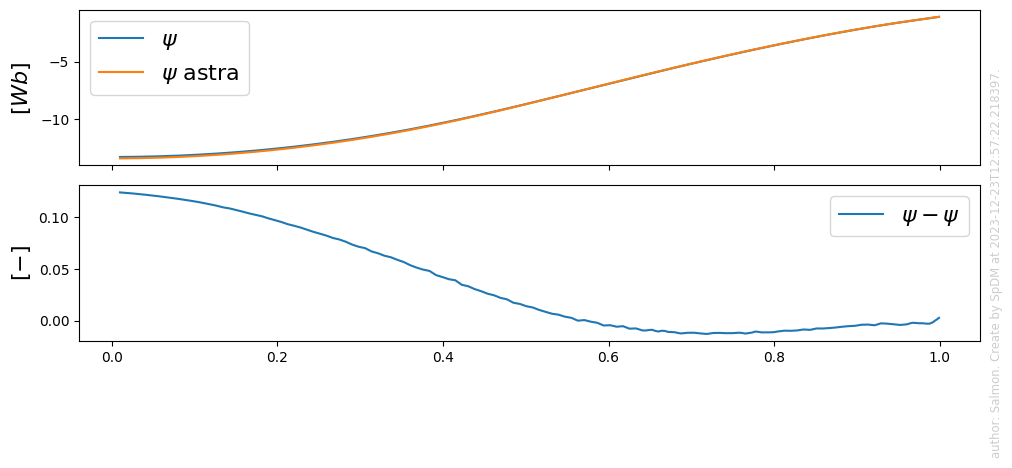

In [12]:
fig = sp_view.plot(
    solver_1d.grid.rho_tor_norm,
    [
        (core_profiles_1d.psi, r"$\psi$"),
        (core_profiles_1d_astra.psi, r"$\psi$ astra"),
    ],
     core_profiles_1d.psi-core_profiles_1d_astra.psi
)

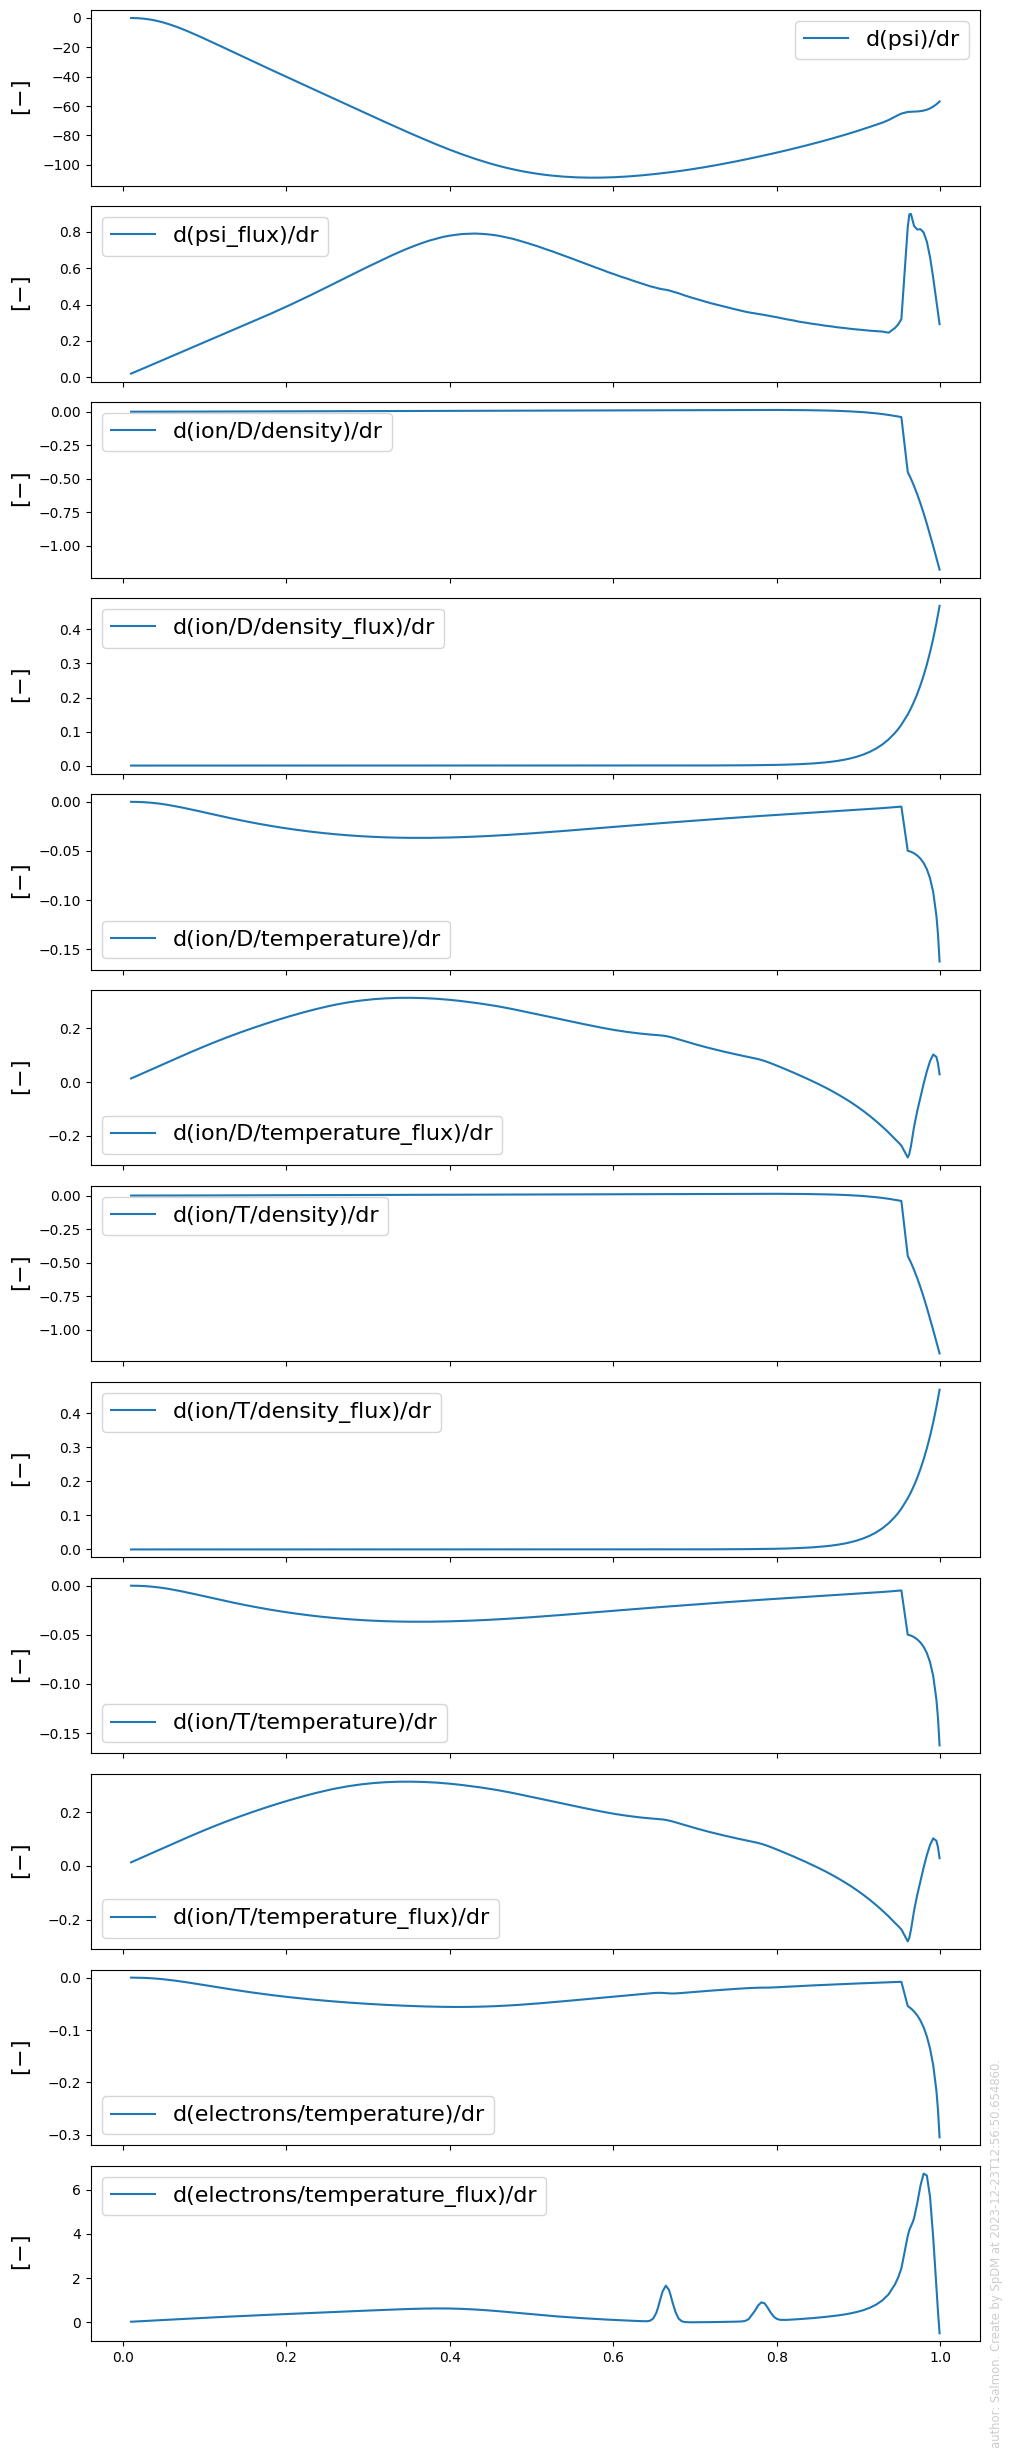

In [8]:
fig = sp_view.plot(
    solver_1d.grid.rho_tor_norm,
    *sum(
        [
            [
                # (solver_1d.Y0[2 * idx], f"d({equ.identifier})/dr"),
                # (solver_1d.Y0[2 * idx + 1], f"d({equ.identifier}_flux)/dr"),
                (equ.d_dr, f"d({equ.identifier})/dr"),
                (equ.dflux_dr, f"d({equ.identifier}_flux)/dr"),
            ]
            for idx, equ in enumerate(solver_1d.equations)
        ],
        [],
    ),
)

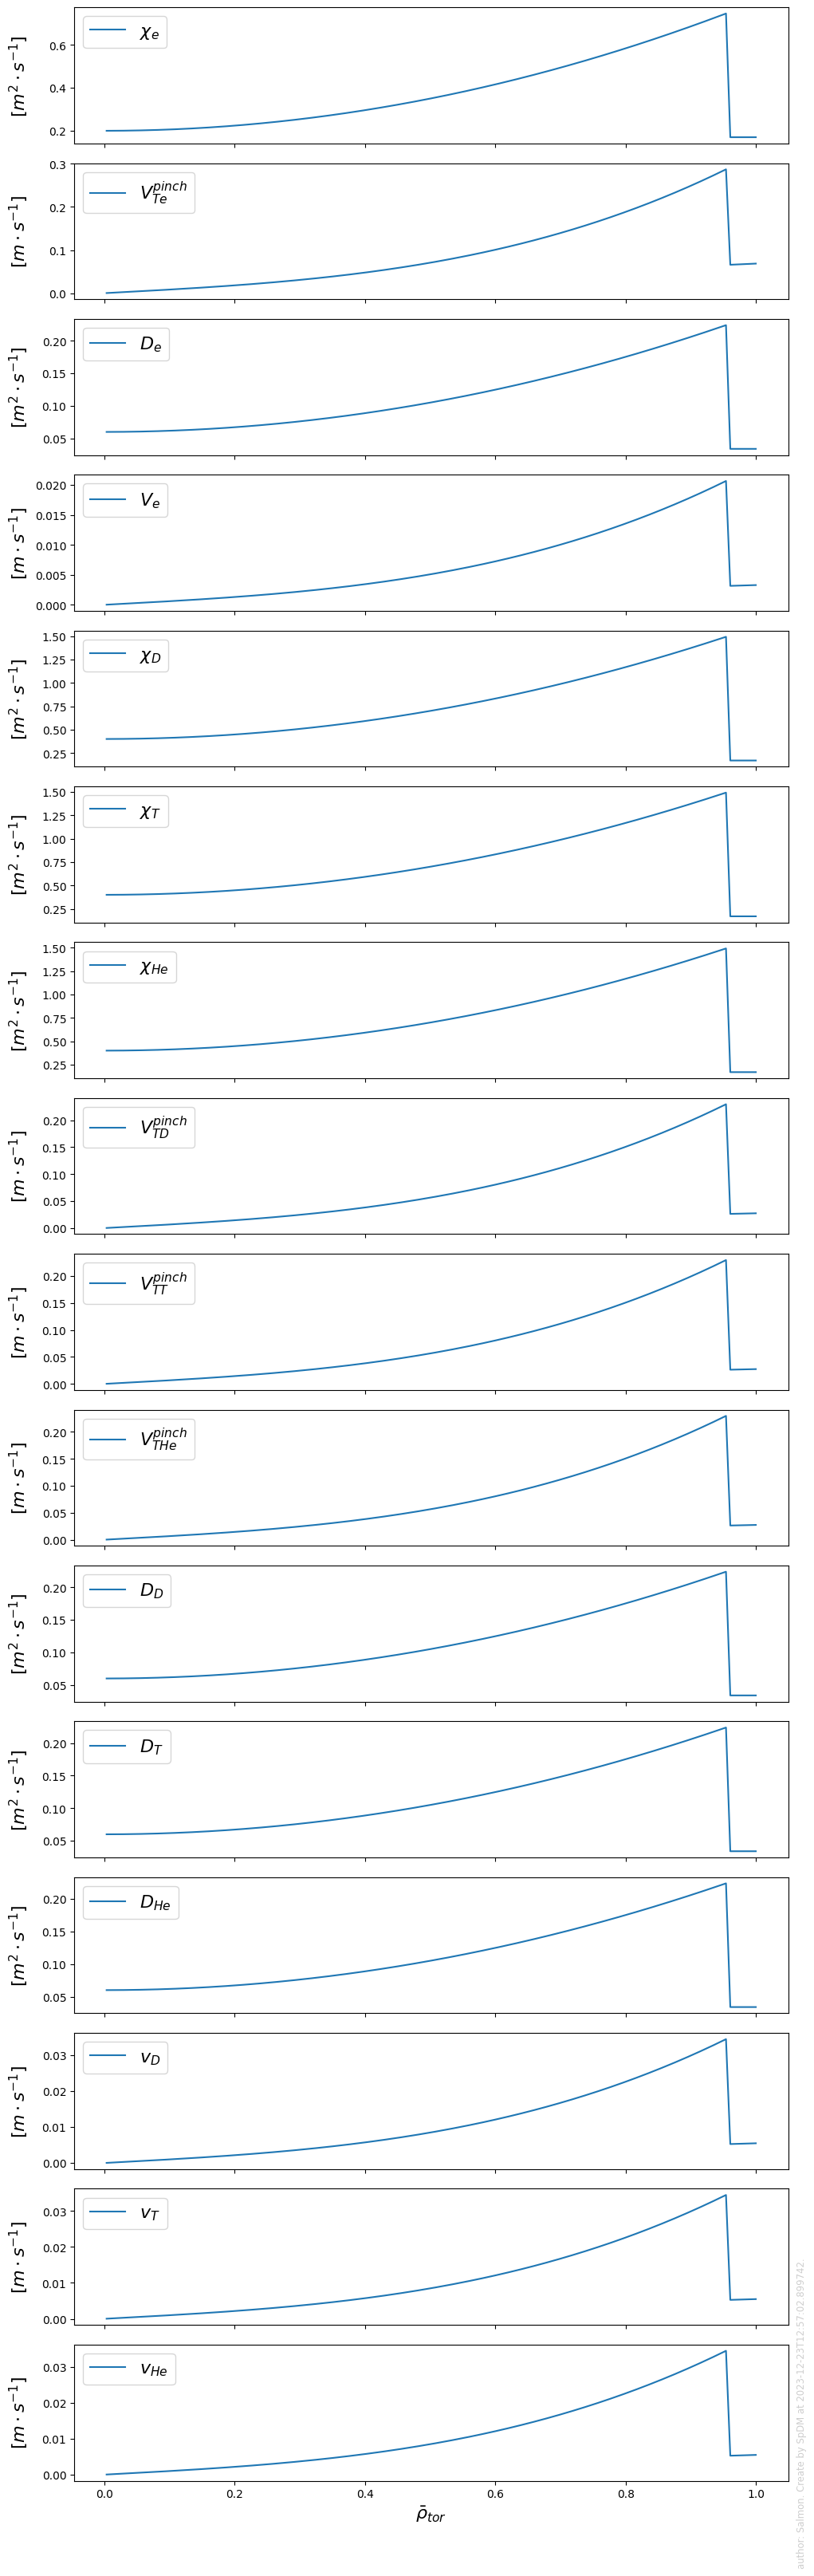

In [9]:
core_transport_1d = tokamak.core_transport.model[0].time_slice.current.profiles_1d

fig = sp_view.plot(
    core_transport_1d.grid_d.rho_tor_norm,
    (core_transport_1d.electrons.energy.d, r"$\chi_e$"),
    (core_transport_1d.electrons.energy.v, r"$V^{pinch}_{Te}$"),
    # (core_sources_1d.electrons.energy_decomposed.explicit_part, r"$Q_{e}$ explicit"),
    # (core_sources_1d.electrons.energy_decomposed.implicit_part, r"$Q_{e}$ implicit"),
    (core_transport_1d.electrons.particles.d, r"$D_e$"),
    (core_transport_1d.electrons.particles.v, r"$V_e$"),
    *[(ion.energy.d, rf"$\chi_{{{ion.label}}}$") for ion in core_transport_1d.ion],
    *[(ion.energy.v, rf"$V^{{pinch}}_{{T{ion.label}}}$") for ion in core_transport_1d.ion],
    *[(ion.particles.d, rf"$D_{{{ion.label}}}$") for ion in core_transport_1d.ion],
    *[(ion.particles.v, rf"$v_{{{ion.label}}}$") for ion in core_transport_1d.ion],
    x_label=r"$\bar{\rho}_{tor}$",
)

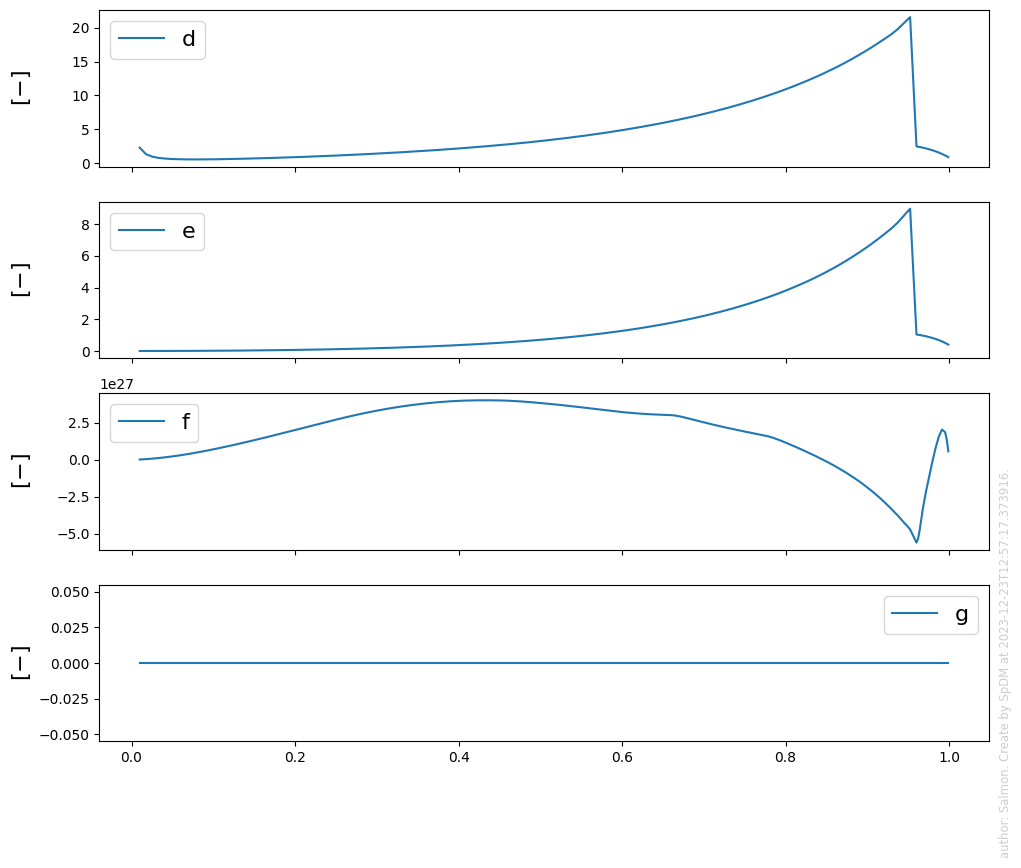

In [10]:
variables = sum([[equ.profile, equ.flux] for equ in solver_1d.equations], [])
equ = solver_1d.equations[4]
bc0, bc1, a, b, c, d, e, f, g, ym = equ.coefficient
x = solver_1d.grid.rho_tor_norm
# y = equ.profile
# yp = equ.d_dr
# flux = equ.flux
# dflux = equ.dflux_dr
fig = sp_view.plot(
    x,
    # (a(x, *variables), "a"),
    # (b(x, *variables), "b"),
    # (c(x,*vars), "c"),
    (d(x, *variables), "d"),
    (e(x, *variables), "e"),
    (f(x, *variables), "f"),
    (g(x, *variables), "g"),
    # tokamak.transport_solver.equations[2].d_dr,
    # [
    #     (d*yp, "$D$"),
    #     (e*y,   "$v$"),
    #     # (flux,   f"$\Gamma$"),
    #     ((c*(f - g * y)).I, r"$S$"),  # $\int c*(f - g \cdot y)$
    #     # ((-d*yp+e*y).I, r"$\Gamma$"),
    #     (-d*yp+e*y-(c*(f - g * y)).I, "residual"),
    # ],
    # y, yp
    # [
    #     (dflux, {"label": r"$d\Gamma$"}),
    #     # (Function(flux, x).d(), r"$d\Gamma$"),
    #     ((c*(f - g * y)), r"$c*(f - g \cdot y)$"),
    # ],
)

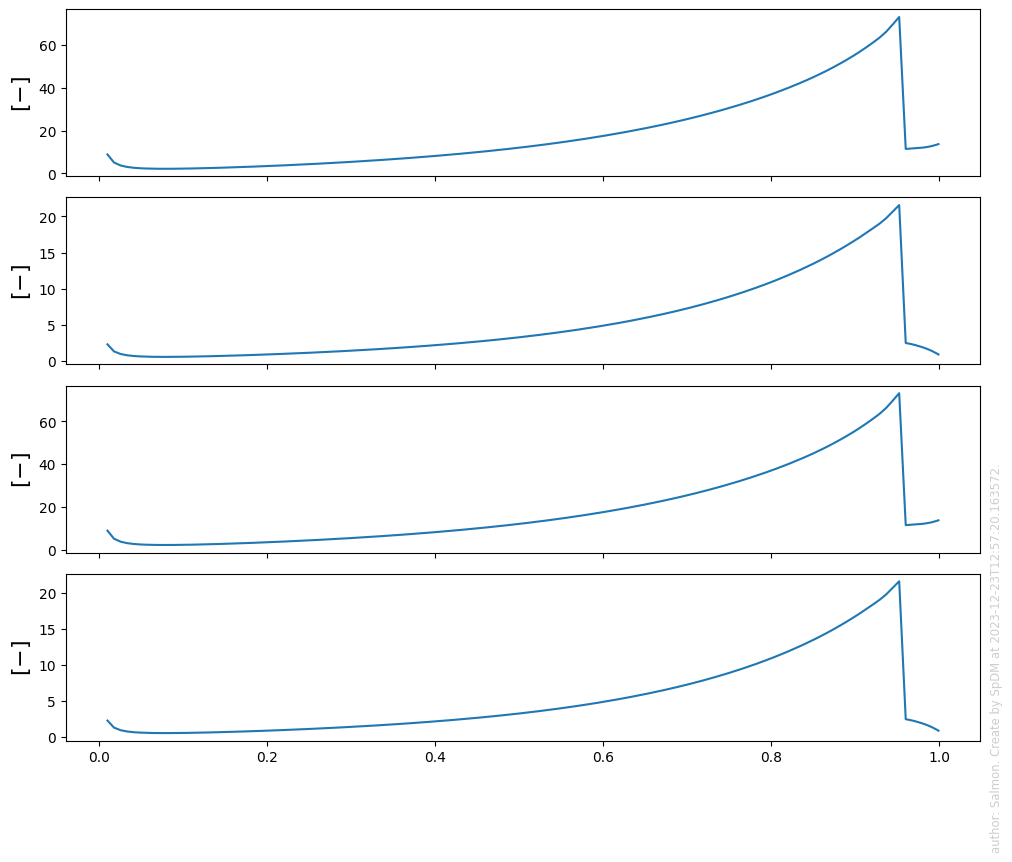

In [11]:
fig = sp_view.plot(
    x,
    solver_1d.equations[1].coefficient[5](x, *variables),
    solver_1d.equations[2].coefficient[5](x, *variables),
    solver_1d.equations[3].coefficient[5](x, *variables),
    solver_1d.equations[4].coefficient[5](x, *variables),
)